In [1]:
## Quantum Teleportation

In [2]:
import numpy as np
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, execute, BasicAer, Aer
from qiskit.visualization import plot_histogram, plot_bloch_multivector
from qiskit.extensions import Initialize
from qiskit_textbook.tools import random_state, array_to_latex
from numpy.random import randint

In [3]:
def create_bell_pair(qc, a, b):
    '''Creates a bell pair in qc using qubits a & b'''
    qc.h(a) # put qubit a into state |+>
    qc.cx(a, b) # CNOT with a as control and b as target

def alice_gates(qc, psi, a):
    '''psi is the qubit to be sent, a is Alice's half of Bell state '''
    qc.cx(psi, a)
    qc.h(psi)

def measure_and_send(qc, a, b):
    '''Measures qubits a & b and 'sends' the results to Bob '''
    qc.barrier()
    qc.measure(a, 0)
    qc.measure(b, 1)

def bob_gates(qc, qubit, crz, crx):
    # Here we use c_if to control our gates with a classical
    #   bit instead of a qubit
    qc.x(qubit).c_if(crx, 1) # Apply gates if the registers
    qc.z(qubit).c_if(crz, 1) #   are in state '1'

<IPython.core.display.Math object>

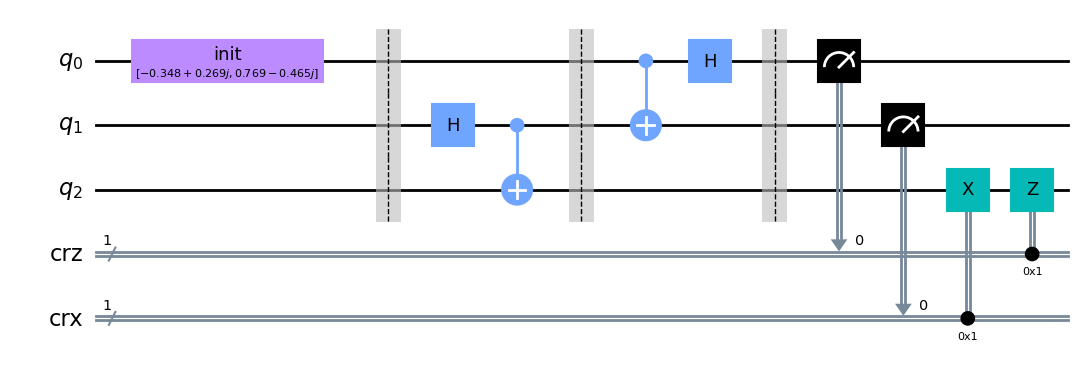

In [4]:
qr = QuantumRegister(3, name='q') # Protocol uses 3 qubits
crz = ClassicalRegister(1, name='crz') # and 2 classical bits
crx = ClassicalRegister(1, name='crx') # and 2 different registers
qc = QuantumCircuit(qr, crz, crx)

# Create a random qubit for psi
psi = random_state(1)

# Display it nicely so we can check the result later
array_to_latex(psi, pretext='|\\psi\\rangle =')

# Now construct a gate to do the initialization
init_gate = Initialize(psi)
init_gate.label = 'init'

# Start with our initial qubit psi
qc.append(init_gate, [0])
qc.barrier()

# Now create and entangled pair
create_bell_pair(qc, 1, 2)
qc.barrier()

# Add Alice's gate to the circuit
alice_gates(qc, 0, 1)

# Send 2 classical bits to Bob
measure_and_send(qc, 0, 1)

# Bob decodes the classical qubits to get the original qubit psi
bob_gates(qc, 2, crz, crx)

# Display the circuit
qc.draw('mpl')

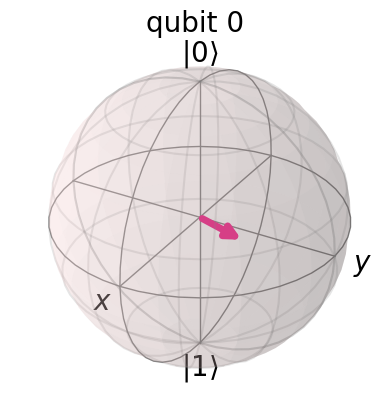

In [5]:
plot_bloch_multivector(psi)

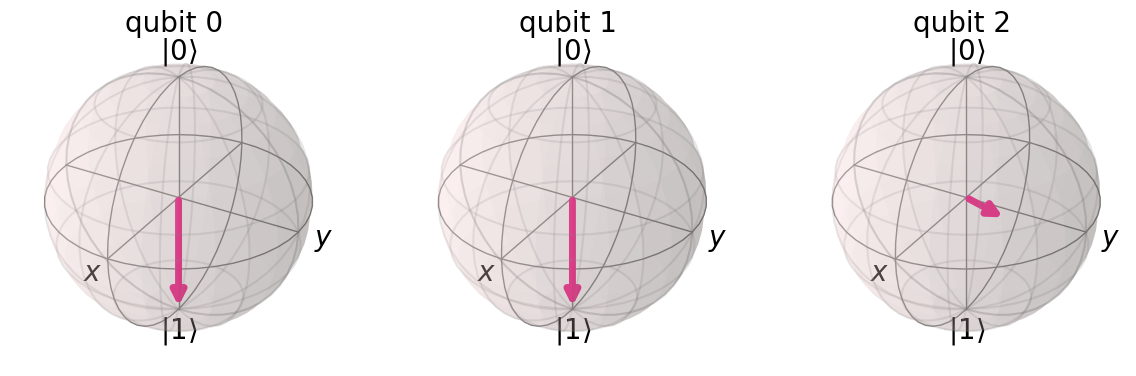

In [6]:
backend = BasicAer.get_backend('statevector_simulator')
out_vector = execute(qc, backend).result().get_statevector()
plot_bloch_multivector(out_vector)